In [1]:
from google.colab import files
uploaded=files.upload()

Saving twitter_training.csv to twitter_training.csv


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("twitter_training.csv")
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [7]:
df=df.drop(columns=['2401','Borderlands'])

In [8]:
df = df.rename(columns={'Positive': 'Sentiment', 'im getting on borderlands and i will murder you all ,': 'talks'})

In [9]:
df

,Sentiment,talks
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
74676,Positive,Just realized that the Windows partition of my...
74677,Positive,Just realized that my Mac window partition is ...
74678,Positive,Just realized the windows partition of my Mac ...
74679,Positive,Just realized between the windows partition of...


In [10]:
# Reorder the columns
df = df.reindex(columns=['talks','Sentiment'])

In [11]:
df

,talks,Sentiment
0,I am coming to the borders and I will kill you...,Positive
1,im getting on borderlands and i will kill you ...,Positive
2,im coming on borderlands and i will murder you...,Positive
3,im getting on borderlands 2 and i will murder ...,Positive
4,im getting into borderlands and i can murder y...,Positive
...,...,...
74676,Just realized that the Windows partition of my...,Positive
74677,Just realized that my Mac window partition is ...,Positive
74678,Just realized the windows partition of my Mac ...,Positive
74679,Just realized between the windows partition of...,Positive


In [12]:
print(df.isnull().sum())

talks        686
Sentiment      0
dtype: int64


In [13]:
df.dropna(inplace=True)

In [14]:
print(df.isnull().sum())

talks        0
Sentiment    0
dtype: int64


In [15]:
import matplotlib.pyplot as plt

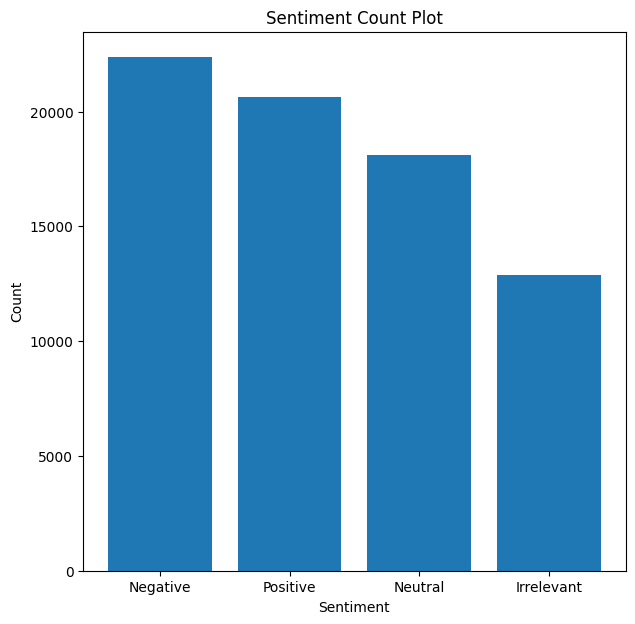

In [18]:
sentiment_counts =df['Sentiment'].value_counts()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(7, 7))

# Plot the count plot using Matplotlib
ax.bar(sentiment_counts.index, sentiment_counts.values)

# Customize the plot
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Sentiment Count Plot')

# Show the plot
plt.show()

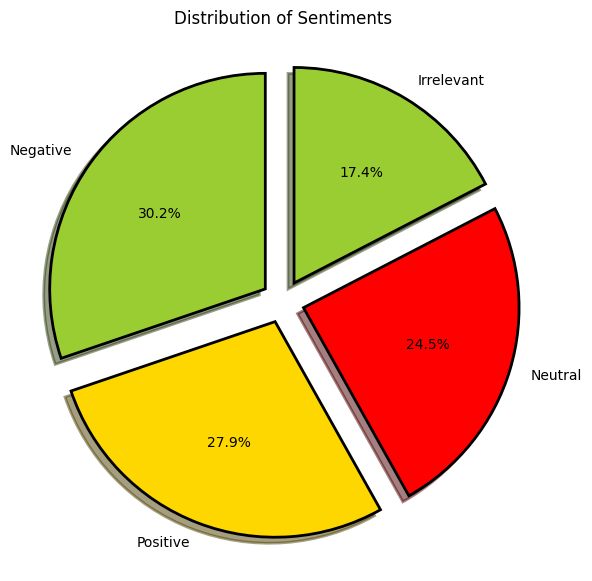

In [19]:
tags = df['Sentiment'].value_counts()

# Colors for the pie chart wedges
colors = ("yellowgreen", "gold", "red")

# Wedge properties
wp = {'linewidth': 2, 'edgecolor': "black"}

# Calculate the number of unique sentiment categories
num_categories = len(tags)

# Explode the wedges (separate a few slices)
explode = [0.1] * num_categories

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(tags, labels=tags.index, autopct='%1.1f%%', shadow=True,
        colors=colors, startangle=90, wedgeprops=wp, explode=explode)

# Set the title
plt.title('Distribution of Sentiments')

# Show the pie chart
plt.show()


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 2: Handle Missing Values (Replace NaN with an empty string)
df['talks'].fillna('', inplace=True)

# Step 3: Vectorize Text Data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Choose the number of features as needed
X = tfidf_vectorizer.fit_transform(df['talks']).toarray()
y = df['Sentiment']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate the model's performance on the training data
y_pred_train = model.predict(X_train)

# Print accuracy and other metrics
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Classification Report:")
print(classification_report(y_train, y_pred_train))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.6194675315899723
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.56      0.41      0.48     10251
    Negative       0.67      0.73      0.70     17895
     Neutral       0.61      0.55      0.58     14519
    Positive       0.60      0.69      0.64     16531

    accuracy                           0.62     59196
   macro avg       0.61      0.60      0.60     59196
weighted avg       0.62      0.62      0.61     59196

Confusion Matrix:
[[ 4238  1950  1490  2573]
 [  919 13127  1676  2173]
 [ 1264  2513  7975  2767]
 [ 1116  2124  1961 11330]]


In [24]:
# Create a new text input to predict
new_text = ['pfizer company is good']

# Vectorize the new text input using the same TF-IDF vectorizer
new_text_vectorized = tfidf_vectorizer.transform(new_text).toarray()

# Predict using the trained logistic regression model
predicted_label = model.predict(new_text_vectorized)

print("Predicted Label:", predicted_label)

Predicted Label: ['Positive']
